## Setting up the environment

In [2]:
import numpy as np # This is the main numerical library we will use
import matplotlib.pyplot as plt # This is the main plotting library we will use
import scipy.io.wavfile as wavfile # We will use this library to load in audio
import IPython.display as ipd # This is a library that allows us to play audio samples in Jupyter

## Audio Waveforms

The first thing we did as a class is load in audio from a .wav file of someone saying "Happy Birthday."  Audio is often sampled at 44100 samples per second, and we see indeed that fs=44100.  As we discussed, we need a sampling frequency that's at least twice the highest frequency we want to represent.  Since the highest frequency humans can hear is around 20,000hz, 44100hz is adequate.  (Another fun fact about this number is it is $2^2 \times 3^2 \times 5^2 \times 7^2$)

In this particular "happy birthday" example, the audio is about 3 seconds long, so we see when we plot the array x that it has about 120,000 samples.  Looking at the plot of the audio waveform, we also see that "birth" occurs between about 54000 and 70000 samples.  So when we slice that out, we only get "birth."

The sample rates is 44100 samples/second


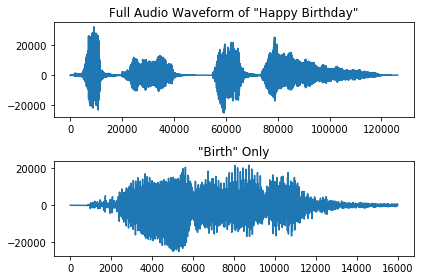

In [5]:
# Load in the audio with wavfile.read.  It gives us both
# the sample rate (fs) and the audio samples as a numpy array (x)
fs, x = wavfile.read("happybirthday.wav")

plt.subplot(2, 1, 1)
plt.plot(x)
plt.title("Full Audio Waveform of \"Happy Birthday\"")
plt.subplot(2, 1, 2)
y = x[54000:70000]
plt.plot(y)
plt.title("\"Birth\" Only")
plt.tight_layout()
ipd.Audio(y, rate=fs)

print("The sample rates is %i samples/second"%fs)

Next, we saw what happens when we change the rate at which we play back the audio.  If we make the playback rate less than the sample rate, then the audio comes out sounding very low pitched and lethargic.  Conversely, if we play the audio back at a faster rate, it sounds very quick and high-pitched, like a "chipmunk voice."  

In [14]:
## Play twice as fast
ipd.Audio(x, rate=fs*2)

We also saw that if we do a different type of slicing and only take one every 12 samples, and play it back 12 times slower, we do get the same sound, but something strange has happened to it called "aliasing."  This animation by one of my collaborators explains this concept very well.  Basically, if we don't take enough samples to represent a high frequency, it comes back sounding like a lower frequency

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Having some fun with <a href="https://twitter.com/hashtag/matplotlib?src=hash&amp;ref_src=twsrc%5Etfw">#matplotlib</a> animation to illustrate aliasing <a href="https://t.co/8LM2XOSThe">pic.twitter.com/8LM2XOSThe</a></p>&mdash; brianmcfee (@functiontelechy) <a href="https://twitter.com/functiontelechy/status/1209274817473634305?ref_src=twsrc%5Etfw">December 24, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

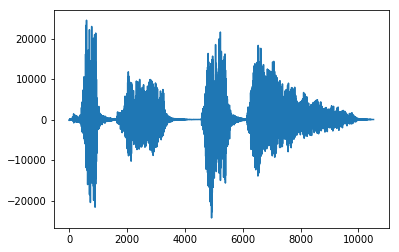

In [17]:
# "Decimate" in time by a factor of 12 (take 1 out of every 12 samples) to demo aliasing
fac = 12 ## Downsample factor
y = x[0::fac]
plt.plot(y)
ipd.Audio(y, rate=fs/fac)

We can also do the reverse slicing operation to play the audio backwards.  One thing I'd recommend trying is to reverse a sound, then record yourself matching that as well as you can.  Then, reverse your sound and see if it sounds like the original

In [18]:
y = x[::-1] #Reverse audio
ipd.Audio(y, rate=fs)

## Sinusoids

We now did something similar to HW1a generating a sinusoid, but we chose the number of samples based on the sample rate of audio, and we chose the frequency to be 440hz, or the pitch of a "concert A."  We then applied the formula 

$ f = 440 \times 2^{(h/12)} $

to compute the fundamental frequency $f$ of a note that is $h$ halfsteps away from concert A.  When we play back the arrays we generate as an audio waveform, we can hear the different pitches as "pure tone" notes.  The current example shows $h=2$, which is a B two halfsteps above A.

391.99543598174927


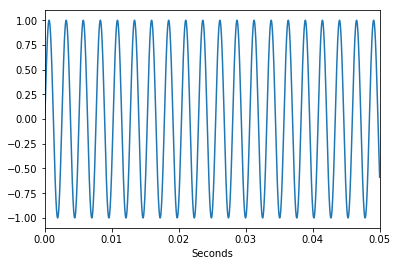

In [4]:
# TODO: Change to use formula for halfsteps
h = -2 # Number of halfsteps away from concert A
freq = 440*(2**(h/12))
print(freq)
fs = 44100  # 44100 samples per second
seconds = 1  # Note duration of 1 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs)

# Generate a 440 Hz sine wave
y = np.sin(2*np.pi*freq*t)
plt.plot(t, y)
plt.xlim([0, 0.05]) # Show the first 50 milliseconds
plt.xlabel("Seconds")
ipd.Audio(y, rate=fs)


We then did an exercise together in which we made a 3 second audio clip, with the first second containing a 440hz A, the 2nd second containing a C#, which is 4 halfsteps above A, and the third second containing an E, which is 7 halfsteps above an A.  Since there are $fs$ samples in a second, we use expressions in terms of $fs$ to mark the beginning and end of second intervals

In [5]:
## Class exercise: Play the major triad notes A, C#, E in a sequence
fs = 44100
y = np.zeros(fs*3)
t = np.linspace(0, 1, fs)
fA = 440
fCSharp = 440*(2**(4/12)) # A C# is 4 halfsteps above A
fE = 440*(2**(7/12)) # An E is 7 halfsteps above A
y[0:fs] = np.sin(2*np.pi*fA*t)
y[fs:fs*2] = np.sin(2*np.pi*fCSharp*t)
y[fs*2:fs*3] = np.sin(2*np.pi*fE*t)
ipd.Audio(y, rate=fs)

We can also add these three notes on top of each other to create a "major chord."  

In [6]:
fs = 44100
t = np.linspace(0, 1, fs)
y = np.zeros(fs)
y = np.sin(2*np.pi*fA*t)
y = y + np.sin(2*np.pi*fCSharp*t)
y = y + np.sin(2*np.pi*fE*t)
ipd.Audio(y, rate=fs)

It's getting a little old to have to write the same kind of code over and over again though.  Instead, we should make one "block" that we can call over and over again.  This is called a <i>method</i> (more details <a href = "http://www.ctralie.com/Teaching/IDS301_S2020/Schedule/CSForAll/Ch2.html#functioning-in-python">here</a>).  Below, we create a method that creates a sinusoid corresponding to a particular note at a particular frequency, for a particular duration.  You will have to something similar on the homework.

<b>Note</b>: There's a "docstring" at the top of this method, which is an extended comment (written as a "multiline string"), which gives information about the input and output of this method.  This is a standard way for people who write libraries to give people who are using them more information about how to use them.

In [3]:
def make_sinusoid(note, fs, duration):
    """
    Parameters
    ----------
    note: int
        The number of halfsteps away from concert A
    fs: int
        The sample rate
    duration: float
        The number of seconds elapsed
        
    Returns
    -------
    ndarray(N)
        An array of samples from an appropriate sinusoid
    """
    ## Step 1: Setup time samples
    t = np.linspace(0, duration, fs*duration)
    ## Step 2: Figure out appropriate frequency
    f = 440*(2**(note/12))
    ## Step 3: Make the array with the appropriate sine
    y = np.sin(2*np.pi*f*t)
    return y

We'll now use this method to compose a little ditty consisting of two A notes, a C#, and two E notes, each 0.5 seconds long with a space of 0.1 seconds before them.  Note how we have to "cast" the expression <code>fs*0.1</code> to an integer value before we create an array of all zeros of that length.  Also, the <code>concatenate</code> command, which puts all of the notes together one after another, is a bit strange, since it requires two sets of parenthesese.  But this is because it's more general than how we're using it (no need to worry about this too much right now)

In [4]:
fs = 44100
xAHalf = make_sinusoid(0, fs, 0.5) # A that's a half a second long
xCSHalf = make_sinusoid(4, fs, 0.5) # C# that's a half a second long
xEHalf = make_sinusoid(7, fs, 0.5)
xSpace = np.zeros(int(fs*0.1)) ## Put a tenth of a second space
x = np.concatenate((xAHalf, xSpace, xAHalf, xSpace, xCSHalf, xSpace, xEHalf, xSpace, xEHalf))
ipd.Audio(x, rate=fs)

In [5]:
## Just a quick demo of what int() does to a decimal number, 
# based on a question in class.  It always rounds down!
int(5.7)

5

Now, we make another kind of periodic waveform known as a "triangle wave," which we can get by starting with a bunch of samples in sequence from <code>arange</code>, and replacing each sample with the remainder after division by 100.  Amazingly, this also gives a pitched soundn which sounds like a "concert A," but this sound is a bit "richer" than the pure sinusoid we saw.  

In fact, this yields a periodic sound with period 100 samples, and at a sample rate of 44100 cycles / second, this has a frequency of 441hz (which is very close to the 440hz concert A we've been listening to).  We saw im class that when we decrease the number by which we're dividing to get the remaider, the period decreases (the waves get closer together), and the pitch goes up.  Conversely, when the number goes up and the period goes up, the frequency also goes down.

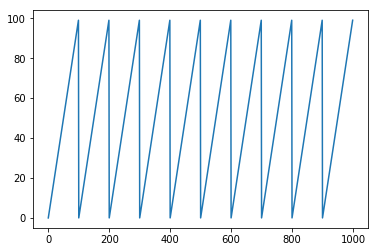

In [6]:
# Show triangle wave
fs = 44100
t = np.arange(fs)
x = np.mod(t, 100)
plt.plot(x[0:1000])
ipd.Audio(x, rate=fs)

## Echoes / Convolution

We now start to use the fact that multiple sounds can play directly on top of each other to simulate echoes.  We start by manually slicing out part of the "happy birthday" sound and playing it back slightly later.  This leads to the echo effect

In [7]:
fs, x = wavfile.read("happybirthday.wav")
ipd.Audio(x, rate=fs)

In [8]:
y = np.array(x) # Copy over x
delay = int(fs/4)
y[delay::] = y[delay::] + y[0:-delay]
ipd.Audio(y, rate=fs)

However, it can get quite tedious to add more echoes if we have to keep doing these slices.  Instead, there's an operation called <i>convolution</i> which can accomplish this for us.  Basically, convolution is an echo simulator.  Given an array <b>x</b> that contains a sound and an array <b>h</b> which contains how much echo is coming back at any particular time, the convolution of <b>x</b> and <b>h</b> will properly superimpose the echoes of <b>x</b> according to <b>h</b>.  The animation below shows this process

<img src = "Conv.gif">

In [38]:
h = np.zeros(fs)
h[0::6000] = 1  ## Impulse response
y = np.convolve(x, h)
ipd.Audio(y, rate=fs)

In [41]:
## Show basic lowpass filter
h = np.ones(4000)
y = np.convolve(x, h, 'valid')
ipd.Audio(y, rate=fs)

## Comb Filters

In [ ]:
# Introduce noise, convolve noise pulse train

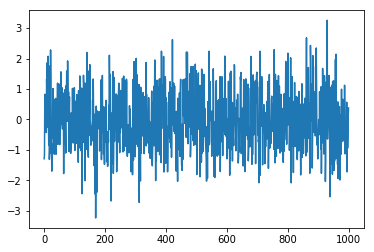

In [58]:
fs = 44100
x = np.random.randn(fs*3)
plt.plot(x[0:1000])
h = np.zeros(fs*2)
h[0::80] = 1  ## Impulse response
y = np.convolve(x, h)
ipd.Audio(y, rate=fs)

## The Discrete Fourier Transform

In [ ]:
def plot_fourier_mag(x, fs):
    """
    Given audio samples and the sample rate, plot
    the magnitude of the Fourier transform of x with 
    the appropriate frequency labels
    Parameters
    ----------
    x: ndarray(N)
        The audio samples
    fs: int
        The sample rate in hz
    """
    xft = np.abs(np.fft.fft(x))
    freqs = np.fft.fftfreq(len(x), 1/fs)
    plt.plot(freqs, np.abs(xft))
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")

In [ ]:
## TODO: Add another frequency, 
freq = 440  
fs = 44100  
seconds = 1

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)
    

# Take the fourier transform of x
plot_fourier(x, fs)

ipd.Audio(x, rate=fs)
plt.xlim([0, 2000])

In [ ]:
## TODO: Look at triangle wave

In [ ]:
## TODO: Look at sinusoidal approximation of triangle wave
y = -np.sin(2*np.pi*440*t) 
## TODO: Class exercise: Add the next 3 harmonics

plt.subplot(211)
plt.plot(y[0:1000])
plt.title("Sawtooth approximation of sinusoid")
plt.subplot(212)
plot_fourier(y, fs)
plt.xlim([0, 8000])
plt.title("Discrete Fourier Transform Magnitude")
plt.tight_layout()
ipd.Audio(y, rate=fs)


In [ ]:
# look at speech, look at noise
# Show effect of lowpass filter